# Forest Fires Data Exploration

In this notebook, we embark on a comprehensive exploration of forest fires dataset. Our journey begins with the importation of essential libraries and the loading of the dataset.

# Import Libraries and Packages

To kickstart our data exploration, we import the necessary libraries and packages for visualization:

In [65]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from scipy import stats

datafile = pd.read_csv("../data/raw/forestfires.csv")

# Dataset Overview:

Before delving into the exploratory analysis, let's take a quick glance at the structure and content of our dataset:

In [66]:
# Displaying dataset information
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [67]:
datafile.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

# Visualizing Forest Fires Data:

Our exploration will involve creating visualizations to better understand the distribution of data and potential relationships between variables. We'll start by exploring basic statistical summaries and visualizations inside the column of area burned since it will be the Y of our linear regression. By looking how the data is distribued and its values we will be able to understand this phenomenon a bit more.

<Axes: ylabel='area'>

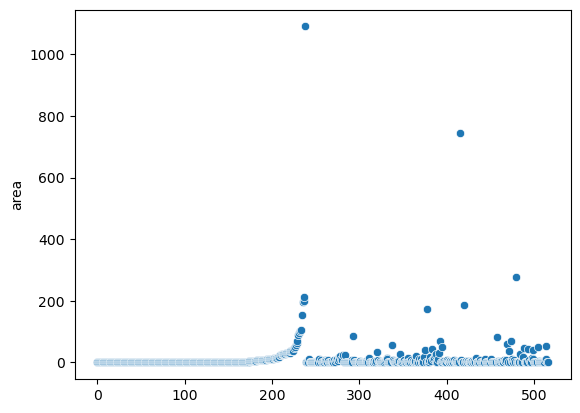

In [68]:
sns.scatterplot(datafile["area"])

<Axes: >

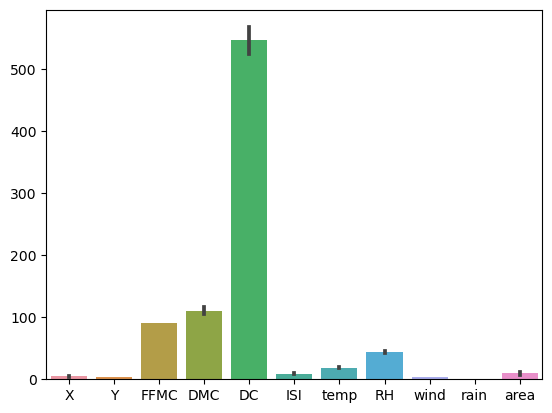

In [69]:
sns.barplot(datafile[datafile["area"] < 300])

<Axes: xlabel='rain', ylabel='Count'>

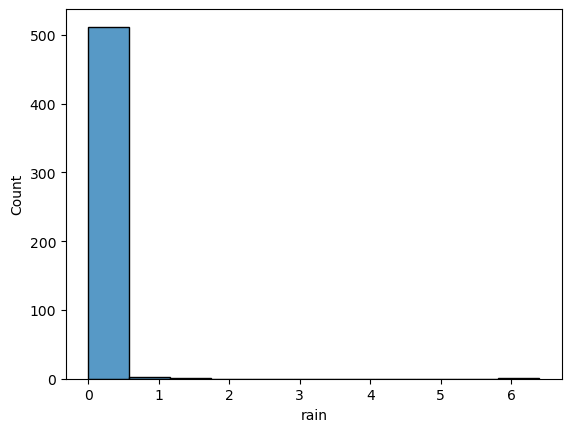

In [70]:
sns.histplot(datafile["rain"])

# Initial Thoughts 

It is possible to see in the burned area column two extreme outliers of 1090.84 ha burned and 746.28 ha. In order to keep our data more concise for the linear regression we can futrely decide to drop these row if the value greatly affects the results of our predictions. Furthermore we can also observe in a larger frequency values under the value of 200 ha and 300 ha burned, demonstrating that perhaps an specific combination of environmental and metereological parameters have created exceptional value for the 1090.84 and 746.28 area that burned. We can then further analyse the other columns to understand a bit more of our data.

<Axes: xlabel='ISI', ylabel='Count'>

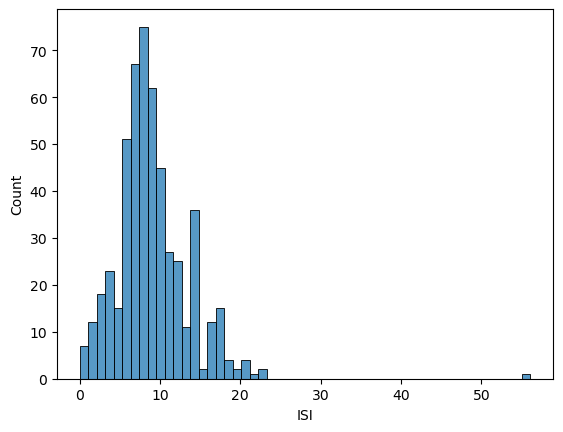

In [71]:
sns.histplot(datafile["ISI"])

<Axes: xlabel='month', ylabel='Count'>

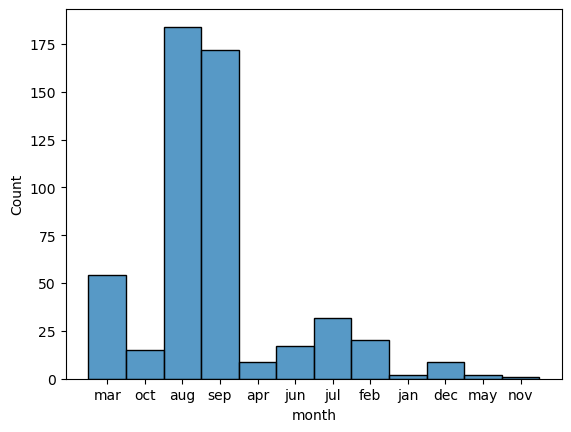

In [72]:
sns.histplot(datafile["month"])

<Axes: ylabel='rain'>

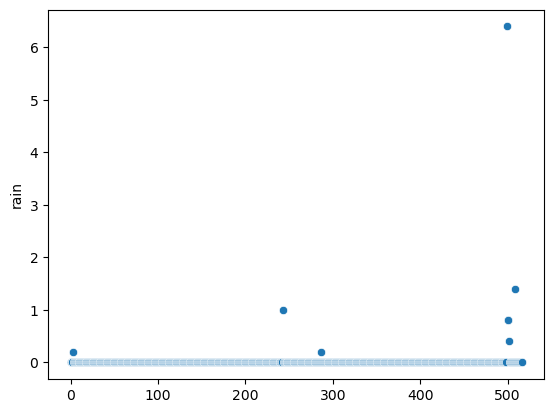

In [73]:
sns.scatterplot(datafile["rain"])

<Axes: xlabel='temp', ylabel='Count'>

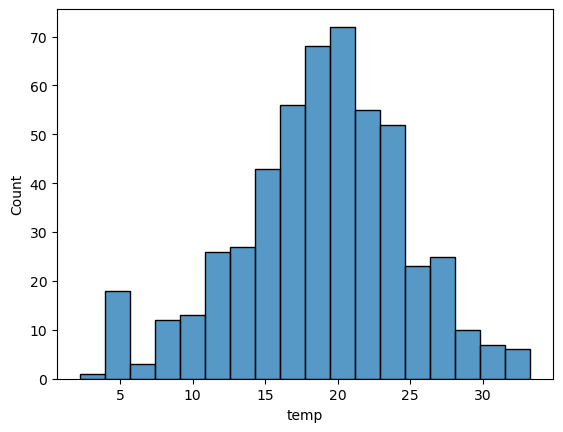

In [74]:
sns.histplot(datafile["temp"])

<Axes: xlabel='RH', ylabel='Count'>

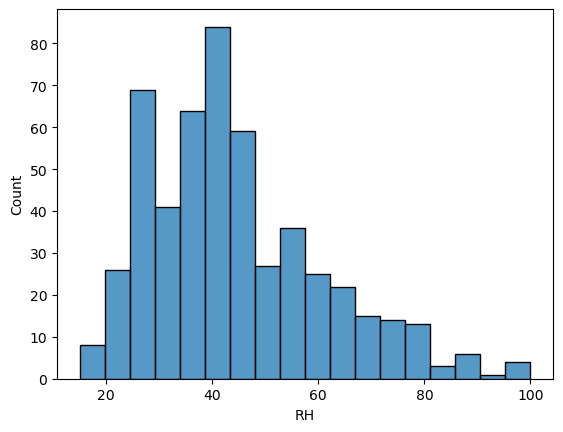

In [75]:
sns.histplot(datafile["RH"])

<Axes: xlabel='temp', ylabel='month'>

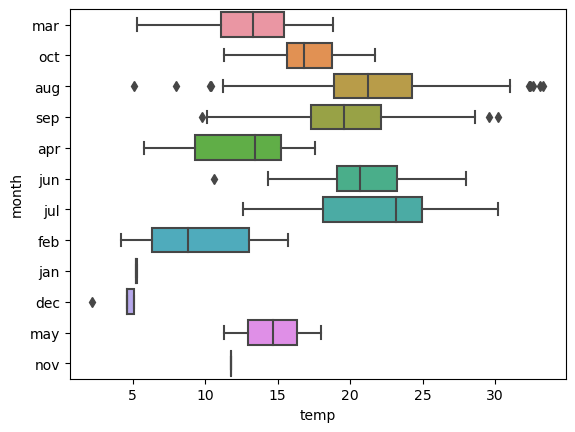

In [76]:
sns.boxplot(y=datafile["month"], x= datafile["temp"])

<Axes: xlabel='temp', ylabel='DMC'>

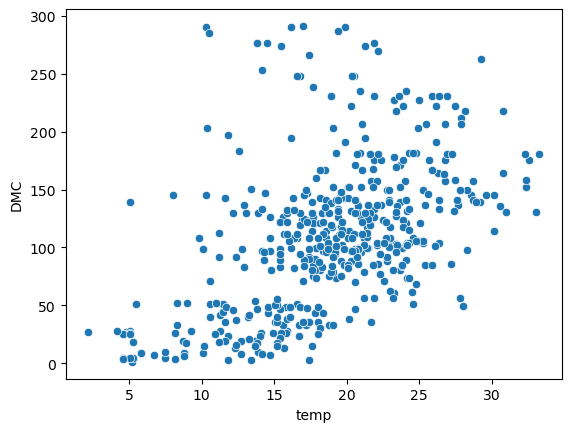

In [77]:
sns.scatterplot(y=datafile["DMC"], x= datafile["temp"])

<Axes: xlabel='temp', ylabel='area'>

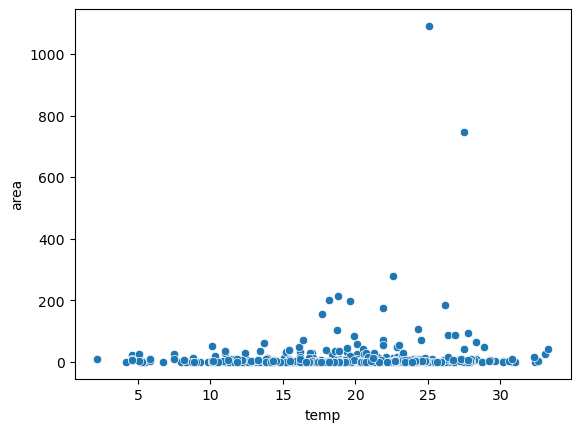

In [78]:
sns.scatterplot(y=datafile["area"], x= datafile["temp"])

<Axes: xlabel='temp', ylabel='ISI'>

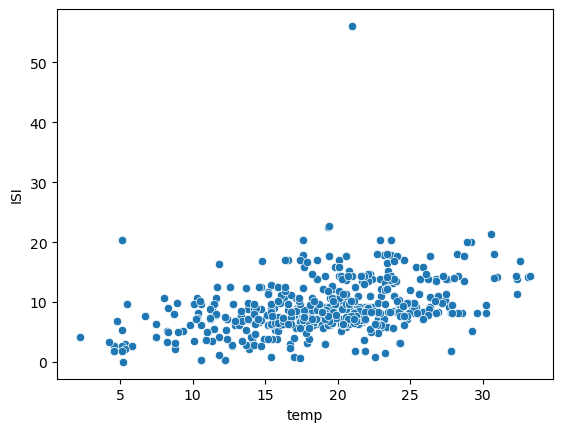

In [79]:
sns.scatterplot(y=datafile["ISI"], x= datafile["temp"])

<Axes: xlabel='temp', ylabel='DC'>

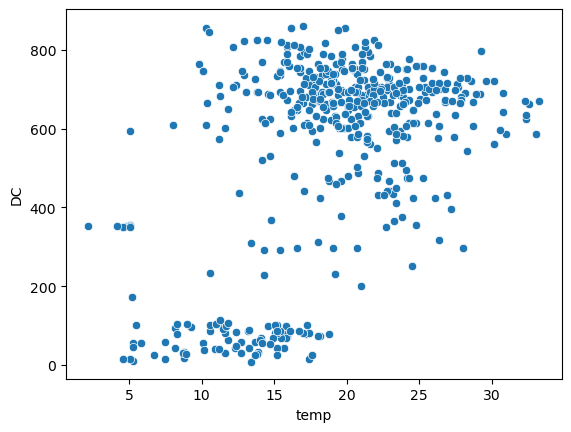

In [80]:
sns.scatterplot(y=datafile["DC"], x= datafile["temp"])

<Axes: xlabel='temp', ylabel='area'>

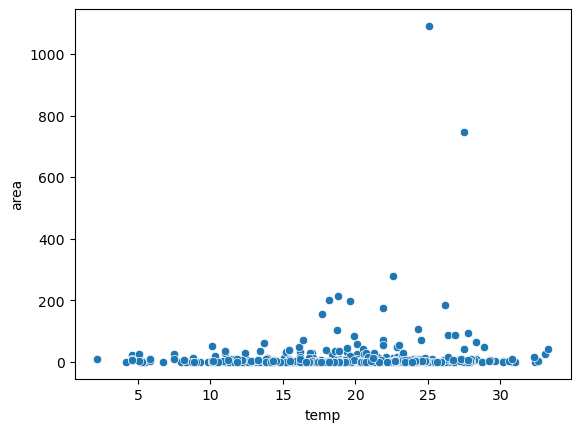

In [81]:
sns.scatterplot(y=datafile["area"], x= datafile["temp"])


<Axes: xlabel='month', ylabel='area'>

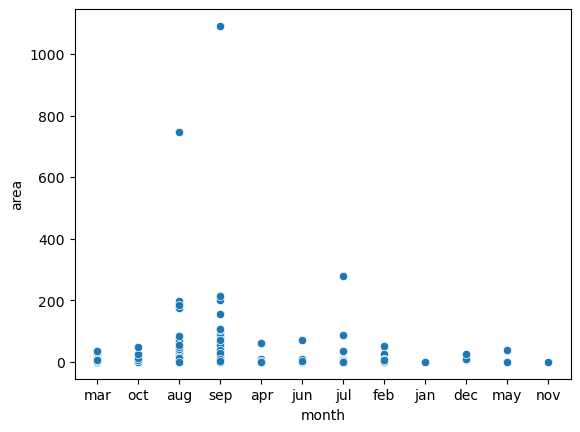

In [82]:
sns.scatterplot(y=datafile["area"], x= datafile["month"])

In [85]:
df_drop = datafile.drop("month", axis= 1).drop("day", axis=1)
correlation_matrix = df_drop.corr()

<Axes: >

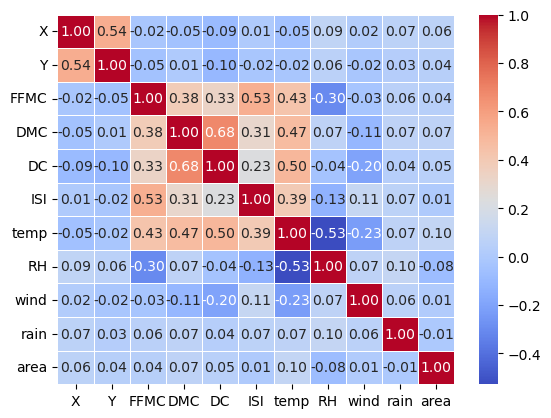

In [87]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Final Impressions

After visualizing the data and potential correlations between the metereological data and the area burned we can perceive that temperature has a great potential correlation in several of the parameters used in the data set with temperatures rising around the summer months.